In [3]:
# Import Packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)



In [55]:
# Read in Data

df = pd.read_csv('/kaggle/input/movies/movies.csv')

In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [34]:
# Loop through data set for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0005216484089723526%
yearcorrect - 0.0%
relasecountry - 0.0%


In [35]:
df.dtypes

name               int16
rating              int8
genre               int8
year               int64
released           int16
score            float64
votes            float64
director           int16
writer             int16
star               int16
country             int8
budget             int64
gross              int64
company            int16
runtime          float64
yearcorrect         int8
relasecountry       int8
dtype: object

In [57]:
df['budget'] = df['budget'].fillna(0).astype('int64')

df['gross'] = df['gross'].fillna(0).astype('int64')

df['yearcorrect'] = df['released'].astype(str).str.split(',').str.get(1).str[:5]

df['relasecountry'] = df['released'].str.extract(r'\((.*?)\)')

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [41]:
#drop any duplicates
df['name'].duplicated().sort_values(ascending=False)
#df['company'].drop_duplicates().sort_values(ascending=False)


6297     True
986      True
1844     True
1742     True
2401     True
        ...  
7067    False
3301    False
4359    False
5405    False
7667    False
Name: name, Length: 7668, dtype: bool

<Axes: >

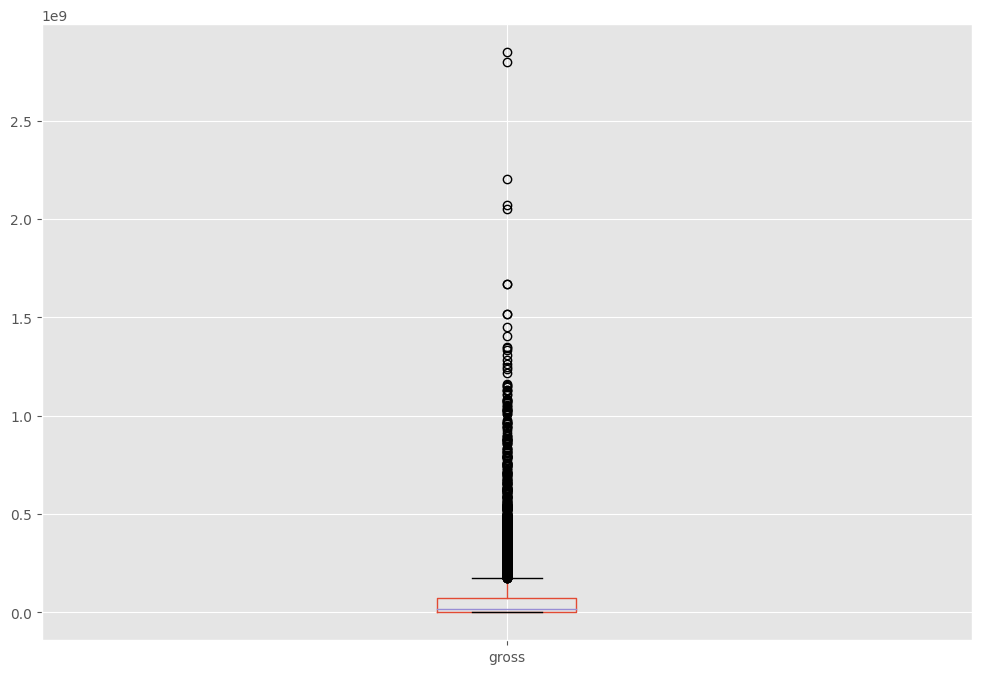

In [42]:
# Are there any Outliers?

df.boxplot(column=['gross'])

<function matplotlib.pyplot.show(close=None, block=None)>

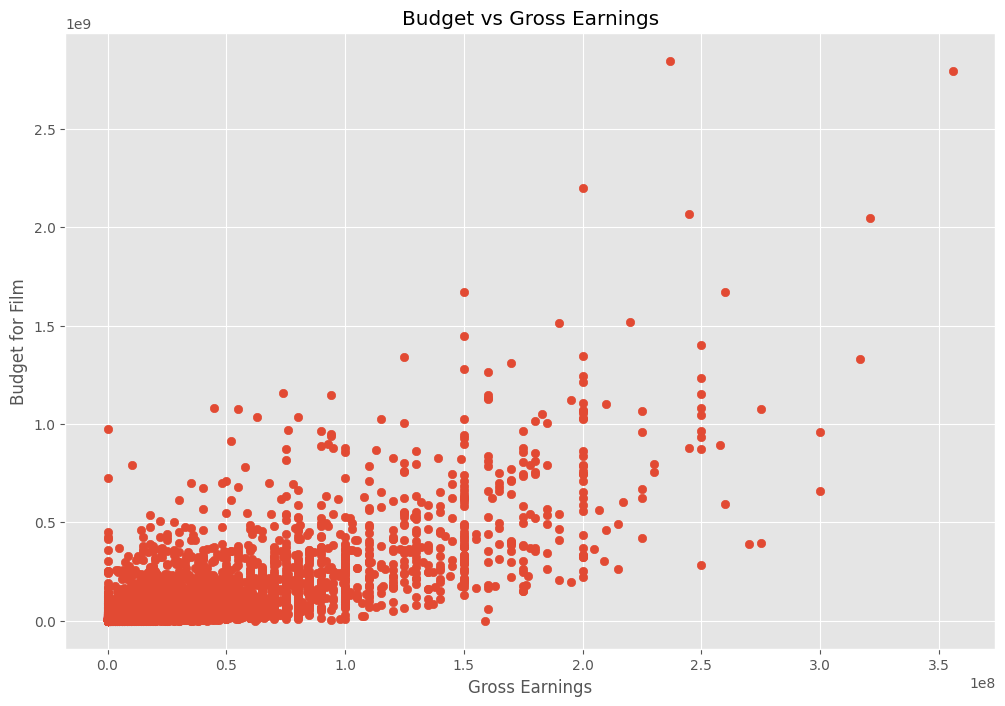

In [8]:
# Build a scatter plot - Budget vs Gross 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

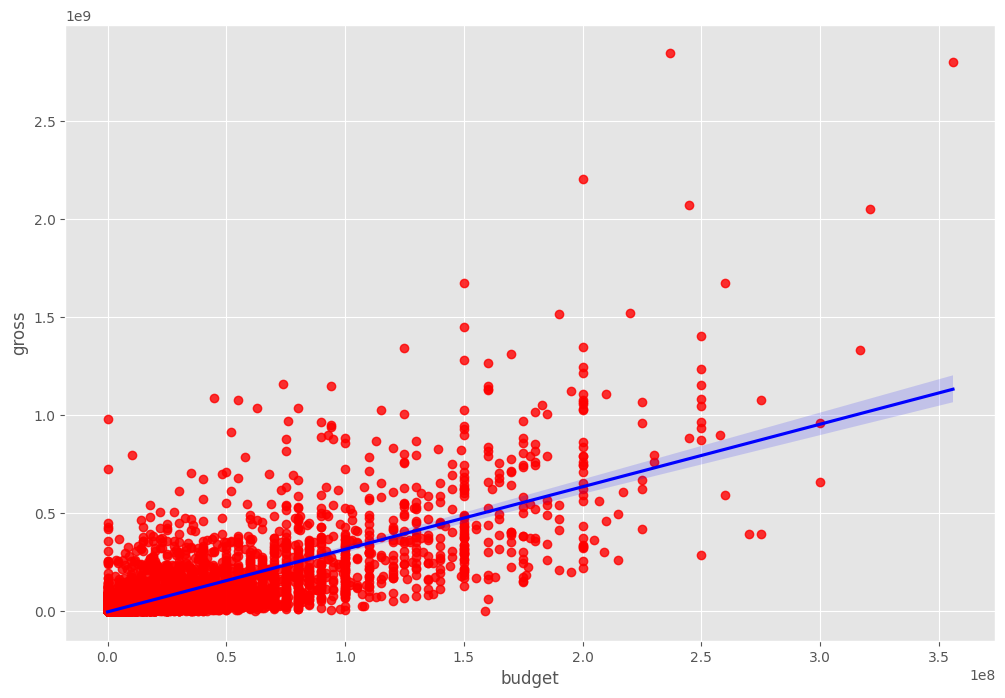

In [13]:
# Add a regression line for visual clarity

sns.regplot(x='budget', y='gross', data=df ,scatter_kws={'color':'red'}, line_kws={'color':'blue'})

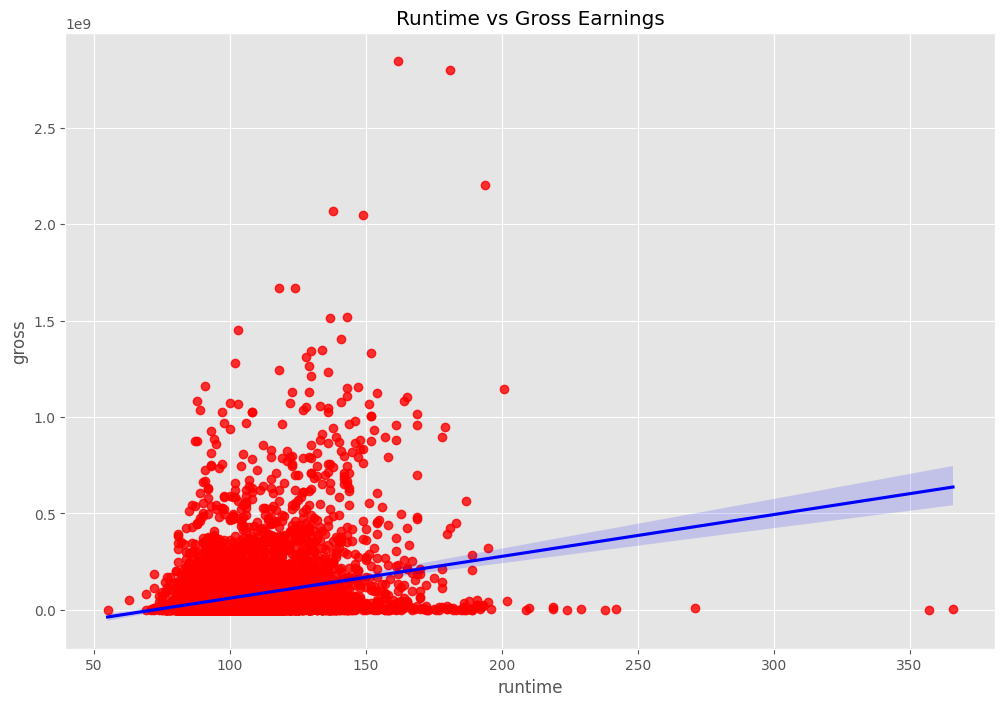

In [43]:
#  - Runtime vs Gross 

sns.regplot(x='runtime', y='gross', data=df ,scatter_kws={'color':'red'}, line_kws={'color':'blue'})

plt.title('Runtime vs Gross Earnings')

plt.show()

In [59]:
# A.Using a for loop and cat.codes to transform object columns into numeric catergorical codes

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,relasecountry
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29,56
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39,56
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17,56
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35,56
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38,56


In [44]:
# B.Using factorize to assign a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,relasecountry
name,1.000000,0.344538,0.138367,0.253906,0.656262,0.107033,0.595709,0.720119,0.782929,0.653260,0.193910,0.111217,0.978147,0.686234,0.071772,0.256430,0.278552
rating,0.344538,1.000000,-0.014784,0.036004,0.263736,-0.069097,0.154171,0.283992,0.303181,0.303931,0.199683,0.083569,0.351587,0.334664,0.033730,0.028958,0.160732
genre,0.138367,-0.014784,1.000000,0.087977,0.090957,0.063222,0.148546,0.093457,0.088192,0.099710,-0.072434,0.101274,0.134001,0.057761,0.005585,0.085155,0.002721
year,0.253906,0.036004,0.087977,1.000000,0.315368,0.076737,0.326475,0.173235,0.212396,0.228048,-0.055861,0.060244,0.266957,0.123375,0.032916,0.935420,-0.086527
released,0.656262,0.263736,0.090957,0.315368,1.000000,0.069418,0.449869,0.502084,0.546858,0.476483,0.163594,0.080321,0.669825,0.467309,0.046191,0.331184,0.419157
score,0.107033,-0.069097,0.063222,0.076737,0.069418,1.000000,0.233438,0.149666,0.103788,0.106953,-0.095521,0.001150,0.113338,0.037358,0.035609,0.083827,-0.042339
votes,0.595709,0.154171,0.148546,0.326475,0.449869,0.233438,1.000000,0.495005,0.521323,0.452185,0.051132,0.038523,0.611780,0.392582,0.067696,0.324622,0.068267
director,0.720119,0.283992,0.093457,0.173235,0.502084,0.149666,0.495005,1.000000,0.696227,0.581049,0.195451,0.043335,0.737284,0.616906,0.080150,0.175311,0.233507
writer,0.782929,0.303181,0.088192,0.212396,0.546858,0.103788,0.521323,0.696227,1.000000,0.590607,0.198955,0.064066,0.797865,0.618775,0.057822,0.209762,0.246253
star,0.653260,0.303931,0.099710,0.228048,0.476483,0.106953,0.452185,0.581049,0.590607,1.000000,0.220061,0.066901,0.669963,0.573670,0.074092,0.232567,0.192004


In [22]:
# A.Correlation Matrix between all columns

df_numerized.corr(method='pearson') 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,relasecountry
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.009553,-0.001968
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.004829,0.023977
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.082070,-0.091572
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.992136,-0.089289
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.001653,-0.044096
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.105341,-0.092763
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.219954,0.092014
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.018620,0.013331
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.006134,-0.001201
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.025288,-0.023540


In [36]:
df_numerized.corr(method='kendall') 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,relasecountry
name,1.000000,-0.009373,0.011615,0.007957,-0.007514,0.007769,0.005842,0.005961,0.006196,0.004366,-0.005985,0.010579,0.003247,0.006715,0.010191,0.006907,-0.003549
rating,-0.009373,1.000000,0.100890,-0.000516,0.023896,0.019863,0.017004,0.007735,0.001079,0.013431,0.022408,-0.082679,-0.120428,-0.061833,0.055823,-0.001265,-0.035444
genre,0.011615,0.100890,1.000000,-0.059866,0.021527,0.049721,-0.149969,-0.012338,0.002779,-0.003664,-0.056763,-0.238948,-0.209988,-0.065025,-0.015251,-0.059061,-0.117765
year,0.007957,-0.000516,-0.059866,1.000000,0.000399,0.067652,0.331465,-0.013311,-0.005800,-0.018181,-0.068822,0.209304,0.216595,-0.002283,0.097184,0.981147,-0.103779
released,-0.007514,0.023896,0.021527,0.000399,1.000000,0.027612,-0.008681,-0.000762,-0.001510,0.010395,-0.020635,-0.004453,-0.029738,-0.004634,0.004405,-0.000542,-0.045313
score,0.007769,0.019863,0.049721,0.067652,0.027612,1.000000,0.300115,0.010082,0.013060,0.000163,-0.172293,-0.005194,0.090626,-0.004454,0.283611,0.073130,-0.097891
votes,0.005842,0.017004,-0.149969,0.331465,-0.008681,0.300115,1.000000,0.012942,0.009177,-0.009153,0.056417,0.439902,0.560118,0.125344,0.198240,0.327426,0.093074
director,0.005961,0.007735,-0.012338,-0.013311,-0.000762,0.010082,0.012942,1.000000,0.227312,0.026451,0.009532,0.015867,0.008428,0.002917,0.010240,-0.012012,0.003887
writer,0.006196,0.001079,0.002779,-0.005800,-0.001510,0.013060,0.009177,0.227312,1.000000,0.018635,0.008789,-0.002856,0.001149,0.003640,-0.008642,-0.004319,-0.012990
star,0.004366,0.013431,-0.003664,-0.018181,0.010395,0.000163,-0.009153,0.026451,0.018635,1.000000,-0.016154,-0.011379,-0.004127,0.006753,0.005899,-0.017072,-0.019764


In [37]:
df_numerized.corr(method='spearman') 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,relasecountry
name,1.000000,-0.012197,0.015940,0.011978,-0.011298,0.011505,0.008739,0.008912,0.009201,0.006639,-0.007715,0.015350,0.004954,0.010211,0.015295,0.010386,-0.004505
rating,-0.012197,1.000000,0.123670,-0.000120,0.031884,0.024234,0.022363,0.010232,0.001379,0.017564,0.025221,-0.097319,-0.153389,-0.079008,0.072508,-0.001512,-0.038960
genre,0.015940,0.123670,1.000000,-0.081261,0.029685,0.067659,-0.204214,-0.016710,0.003902,-0.004860,-0.067968,-0.316964,-0.286896,-0.089637,-0.023203,-0.080181,-0.136639
year,0.011978,-0.000120,-0.081261,1.000000,-0.000334,0.099045,0.469829,-0.019843,-0.008666,-0.026876,-0.088509,0.291152,0.314681,-0.004300,0.142977,0.993504,-0.129016
released,-0.011298,0.031884,0.029685,-0.000334,1.000000,0.041079,-0.014314,-0.001206,-0.002330,0.015694,-0.026772,-0.006963,-0.047161,-0.007243,0.006738,-0.001683,-0.057045
score,0.011505,0.024234,0.067659,0.099045,0.041079,1.000000,0.428138,0.014691,0.019175,0.000372,-0.218330,-0.007500,0.132569,-0.006822,0.399857,0.107161,-0.121117
votes,0.008739,0.022363,-0.204214,0.469829,-0.014314,0.428138,1.000000,0.019429,0.013890,-0.013697,0.073396,0.604627,0.752265,0.185955,0.290159,0.465000,0.116655
director,0.008912,0.010232,-0.016710,-0.019843,-0.001206,0.014691,0.019429,1.000000,0.299032,0.039391,0.012424,0.023166,0.012600,0.004255,0.015192,-0.017962,0.004885
writer,0.009201,0.001379,0.003902,-0.008666,-0.002330,0.019175,0.013890,0.299032,1.000000,0.027368,0.011371,-0.003927,0.001654,0.005256,-0.012915,-0.006494,-0.016341
star,0.006639,0.017564,-0.004860,-0.026876,0.015694,0.000372,-0.013697,0.039391,0.027368,1.000000,-0.020899,-0.016325,-0.005941,0.010087,0.008661,-0.025290,-0.024820


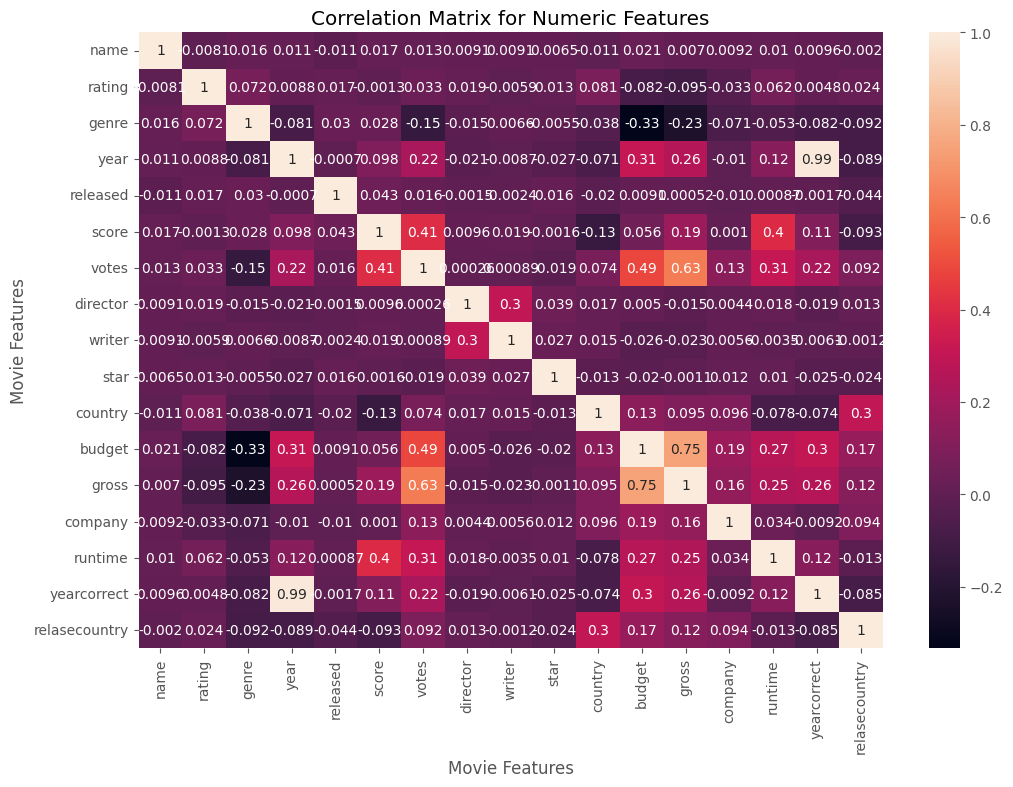

In [60]:
# Visualize the A.correlation matrix

correlation_matrix = df_numerized.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

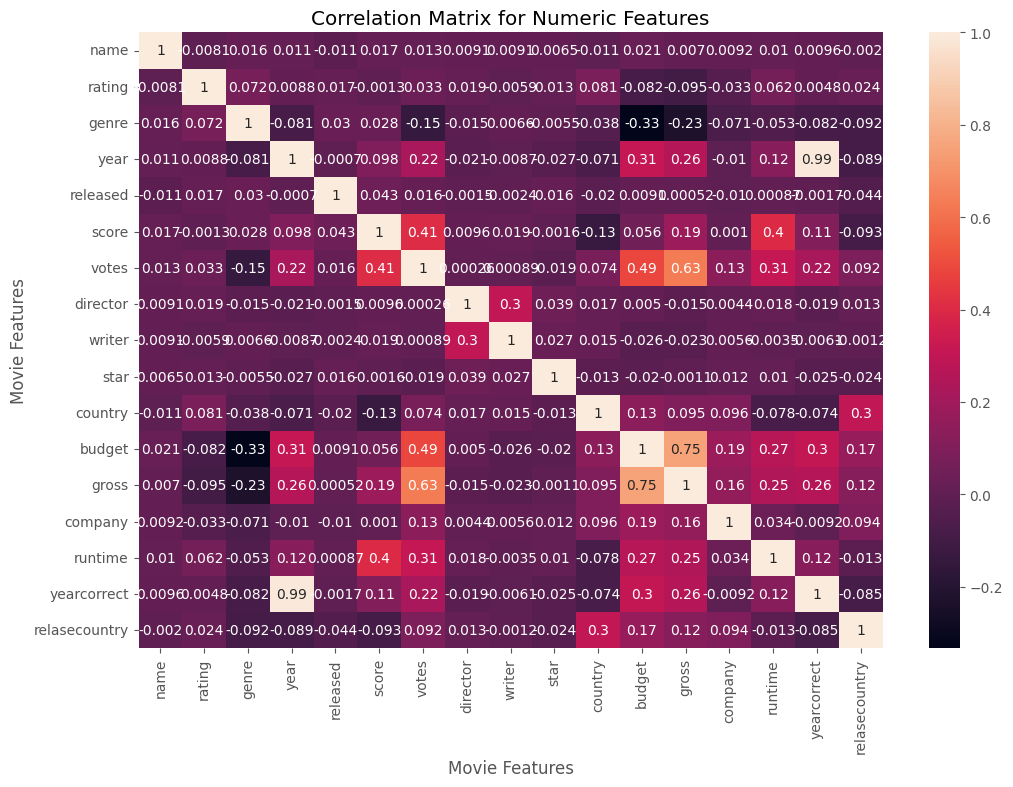

In [47]:
# Visualize the B.correlation matrix

correlation_matrix_b = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [61]:
# Sort Feature Pairs within A.correlation matrix 

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head(15)

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
      score       0.017097
      votes       0.013088
      director    0.009079
      writer      0.009081
      star        0.006472
      country    -0.010737
      budget      0.020548
      gross       0.006989
      company     0.009211
      runtime     0.010392
dtype: float64

In [62]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(15)

budget         genre           -0.334021
genre          budget          -0.334021
gross          genre           -0.234297
genre          gross           -0.234297
               votes           -0.145307
votes          genre           -0.145307
score          country         -0.133348
country        score           -0.133348
gross          rating          -0.095450
rating         gross           -0.095450
score          relasecountry   -0.092763
relasecountry  score           -0.092763
               genre           -0.091572
genre          relasecountry   -0.091572
relasecountry  year            -0.089289
dtype: float64

In [63]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr.head()

# Budget vs Gross and Votes vs Gross have the highest correlation
# Runtime vs Gross has a low correlation

votes   gross          0.632834
gross   votes          0.632834
budget  gross          0.750157
gross   budget         0.750157
year    yearcorrect    0.992136
dtype: float64

In [67]:
# Create a 2nd dataframe for aggregation

df2 = pd.read_csv('/kaggle/input/movies/movies.csv')

df2['budget'] = df2['budget'].fillna(0).astype('int64')

df2['gross'] = df2['gross'].fillna(0).astype('int64')

df2['yearcorrect'] = df2['released'].astype(str).str.split(',').str.get(1).str[:5]

df2['relasecountry'] = df2['released'].str.extract(r'\((.*?)\)')

df2 = df2.sort_values(by=['gross'], inplace=False, ascending=False)

In [89]:
df2.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,relasecountry
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States


In [75]:
# Looking at the top 15 compaies by year of highest gross revenue

CoGrossSum = df2.groupby(['company', 'yearcorrect'])[["gross"]].sum()

CoGrossSumSorted = CoGrossSum.sort_values(['gross', 'company', 'yearcorrect'], ascending = False)[:15]

CoGrossSumSorted

gross
company               yearcorrect            
Walt Disney Pictures  2019         5773131804
Marvel Studios        2018         4018631866
Universal Pictures    2015         3834354888
Twentieth Century Fox 2009         3793491246
Walt Disney Pictures  2017         3789382071
Paramount Pictures    2011         3565705182
Warner Bros.          2010         3300479986
                      2011         3168551343
Walt Disney Pictures  2010         3104474158
Paramount Pictures    2014         3071298586
Columbia Pictures     2019         2932757449
                      2006         2918469353
Marvel Studios        2019         2797501328
Warner Bros.          2018         2774168962
                      2005         2773019821

In [76]:
# Looking at the top 15 compaies by gross revenue

CompGrossSum = df2.groupby('company')[["gross"]].sum()

CompGrossSumSorted = CompGrossSum.sort_values('gross', ascending = False)[:15]

CompGrossSumSorted

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858
